<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="10%" align="left" border="0">

# Financial Time Series(金融时间序列)
关于matplotlib可参考<https://github.com/SynMind/MyStudy/blob/master/matplotlib/matplotlib.md>

In [1]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### DataFrame Class

```python
Init signature: pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)
Docstring:     
Two-dimensional size-mutable, potentially heterogeneous(由很多种类组成的) tabular(表格式的) data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure

Parameters
----------
data : numpy ndarray (structured or homogeneous), dict, or DataFrame

    Dict can contain Series, arrays, constants, or list-like objects
    
    
index(pandas Index类的实例) : Index or array-like(类似数组：和ndarray对象类似的数据结构，如列表对象)

    Index to use for resulting frame. Will default to `np.arange(n)` if
    no indexing information part of input data and no index provided
    
    
columns : Index or array-like

    Column labels to use for resulting frame. Will default to
    np.arange(n) if no column labels are provided
    
    
dtype : dtype, default None

    Data type to force, otherwise infer(使用/强制的数据类型；否则通过推导得出)
    
    
copy : boolean, default False

    Copy data from inputs. Only affects DataFrame / 2d ndarray input

Examples
--------
>>> d = {'col1': ts1, 'col2': ts2}
>>> df = DataFrame(data=d, index=index)
>>> df2 = DataFrame(np.random.randn(10, 5))
>>> df3 = DataFrame(np.random.randn(10, 5),
...                 columns=['a', 'b', 'c', 'd', 'e'])

See also
--------
DataFrame.from_records : constructor from tuples, also record arrays
DataFrame.from_dict : from dicts of Series, arrays, or dicts
DataFrame.from_items : from sequence of (key, value) pairs
pandas.read_csv, pandas.read_table, pandas.read_clipboard
Type:           type
```

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index(索引) values

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns  # the column names(标签)

Index(['numbers'], dtype='object')

In [6]:
df.ix['c']  # selection via index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


numbers    30
Name: c, dtype: int64

In [7]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [8]:
df.loc[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [9]:
df.loc[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [10]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [11]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


一般地，可在DataFrame对象上进行和NumPy ndarray对象相同的向量化操作：

In [12]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


在两个维度上同时扩增DataFrame对象：

In [13]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [14]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

取整个DataFrame对象来定义新列(此时，索引自动分配)

In [15]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [16]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [17]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


### 处理缺漏信息

In [18]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1.0
b,2.50,Felix,20,4.0
c,3.50,Francesc,30,9.0
d,4.50,Yves,40,16.0
z,5.75,Henry,100,NaN


pandas默认只接受索引已经存在的值，我们丢失了索引为y的值，而在z处看到的是`NaN`值。为了保留这两个索引，我们可以提供一个附加参数，告诉pandas如何连接。      
`how='outer'`表示使用两个索引中所有值的并集：

In [19]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10.0,1.0
b,2.50,Felix,20.0,4.0
c,3.50,Francesc,30.0,9.0
d,4.50,Yves,40.0,16.0
y,NaN,NaN,NaN,25.0
z,5.75,Henry,100.0,NaN


连接操作还有其他选项：      
1. `inner`: 索引的交集
2. `left`: 默认值，使用调用方法的对象中的索引值
3. `right`: 使用被连接对象的索引值

尽管有缺失值，但是大部分方法调用仍然有效：

In [20]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40.0
squares    11.0
dtype: float64

In [21]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### 处理数值数据

In [22]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 0.883851, -0.961183,  0.383887, -1.802687],
       [ 1.267195, -0.251781,  0.400204, -0.117185],
       [-0.596024, -1.095059,  1.429807,  0.807176],
       [ 0.616109, -0.402194,  1.616859,  1.707242],
       [ 0.42436 , -0.292295,  2.316483, -0.469215],
       [ 0.523468, -0.514087, -1.732358, -0.736181],
       [ 0.933527, -1.399667,  1.904331, -1.820248],
       [ 0.85628 ,  0.286347, -0.397159,  0.564787],
       [-0.858753,  0.135108, -0.789764,  0.335903]])

In [23]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,0.883851,-0.961183,0.383887,-1.802687
1,1.267195,-0.251781,0.400204,-0.117185
2,-0.596024,-1.095059,1.429807,0.807176
3,0.616109,-0.402194,1.616859,1.707242
4,0.424360,-0.292295,2.316483,-0.469215
5,0.523468,-0.514087,-1.732358,-0.736181
6,0.933527,-1.399667,1.904331,-1.820248
7,0.856280,0.286347,-0.397159,0.564787
8,-0.858753,0.135108,-0.789764,0.335903


和结构数组一样，DataFrame对象可通过一个具有合适数量元素的列表，直接定义列名；      
可以随时定义/更改DataFrame对象的属性：

In [24]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,0.883851,-0.961183,0.383887,-1.802687
1,1.267195,-0.251781,0.400204,-0.117185
2,-0.596024,-1.095059,1.429807,0.807176
3,0.616109,-0.402194,1.616859,1.707242
4,0.424360,-0.292295,2.316483,-0.469215
5,0.523468,-0.514087,-1.732358,-0.736181
6,0.933527,-1.399667,1.904331,-1.820248
7,0.856280,0.286347,-0.397159,0.564787
8,-0.858753,0.135108,-0.789764,0.335903


列名提供访问DataFrame对象中数据的高效机制，同样和结构数组类似：

In [25]:
df['No2'][3]  # value in column No2 at index position 3

-0.40219373880241727

使用`date_range`生成一个DatetimeIndex对象：

In [26]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M')

```python
Signature: pd.date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None, **kwargs)
Docstring:
Return a fixed frequency datetime index, with day (calendar) as the default
frequency

Parameters
----------
start : string or datetime-like, default None
    Left bound for generating dates(生成日期的左界)
end : string or datetime-like, default None
    Right bound for generating dates(生成日期的右界)
periods : integer or None, default None
    If None, must specify start and end
freq : string or DateOffset(日期偏移), default 'D' (calendar daily)
    Frequency strings(频率字符串) can have multiples, e.g. '5H'
tz : string or None
    Time zone name for returning localized DatetimeIndex(本地化索引的时区名称), for example
    Asia/Hong_Kong
normalize : bool, default False
    Normalize start/end dates to midnight before generating date range(将start和end规范化为午夜)
name : str, default None
    Name of the resulting index(结果索引的名称)
closed : string or None, default None
    Make the interval closed with respect to the given frequency to
    the 'left', 'right', or both sides (None)

Notes
-----
2 of start, end, or periods must be specified

To learn more about the frequency strings, please see `this link
<http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases>`__.

Returns
-------
rng : DatetimeIndex
Type:      function
```

和列一样，我们将新生成的DatetimeIndex作为新的Index对象，赋给DataFrame对象：

In [27]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,0.883851,-0.961183,0.383887,-1.802687
2015-02-28,1.267195,-0.251781,0.400204,-0.117185
2015-03-31,-0.596024,-1.095059,1.429807,0.807176
2015-04-30,0.616109,-0.402194,1.616859,1.707242
2015-05-31,0.424360,-0.292295,2.316483,-0.469215
2015-06-30,0.523468,-0.514087,-1.732358,-0.736181
2015-07-31,0.933527,-1.399667,1.904331,-1.820248
2015-08-31,0.856280,0.286347,-0.397159,0.564787
2015-09-30,-0.858753,0.135108,-0.789764,0.335903


##### pd.date_range函数频率freq值

|别名|描述|
|:-|:-|
|`B`|交易日|
|`C`|自定义交易日(实验性)|
|`D`|日历日|
|`W`|每周|
|`M`|每月底|
|`BM`|每月最后一个交易日|
|`MS`|月初|
|`BMS`|每月第一个交易日|
|`Q`|季度末|
|`BQ`|每季度最后一个交易日|
|`QS`|季度初|
|`BQS`|每季度第一个交易日|
|`A`|每年底|
|`BA`|每月最后一个交易日|
|`AS`|每年初|
|`BAS`|每年第一个交易日|
|`H`|每小时|
|`T`|每分钟|
|`S`|每秒|
|`L`|毫秒|
|`U`|微秒|

也可以使用NumPy的array函数从DataFrame生成一个ndarray

In [28]:
np.array(df).round(6)

array([[ 0.883851, -0.961183,  0.383887, -1.802687],
       [ 1.267195, -0.251781,  0.400204, -0.117185],
       [-0.596024, -1.095059,  1.429807,  0.807176],
       [ 0.616109, -0.402194,  1.616859,  1.707242],
       [ 0.42436 , -0.292295,  2.316483, -0.469215],
       [ 0.523468, -0.514087, -1.732358, -0.736181],
       [ 0.933527, -1.399667,  1.904331, -1.820248],
       [ 0.85628 ,  0.286347, -0.397159,  0.564787],
       [-0.858753,  0.135108, -0.789764,  0.335903]])

## 基本分析

In [29]:
df.sum()

No1    4.050012
No2   -4.494810
No3    5.132290
No4   -1.530409
dtype: float64

In [30]:
df.mean()

No1    0.450001
No2   -0.499423
No3    0.570254
No4   -0.170045
dtype: float64

In [31]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,0.883851,-0.961183,0.383887,-1.802687
2015-02-28,2.151046,-1.212963,0.784090,-1.919872
2015-03-31,1.555022,-2.308022,2.213898,-1.112696
2015-04-30,2.171131,-2.710216,3.830757,0.594546
2015-05-31,2.595490,-3.002511,6.147240,0.125331
2015-06-30,3.118958,-3.516598,4.414882,-0.610850
2015-07-31,4.052485,-4.916266,6.319213,-2.431098
2015-08-31,4.908765,-4.629918,5.922054,-1.866312
2015-09-30,4.050012,-4.494810,5.132290,-1.530409


获取数据集统计数字的捷径：

In [32]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.450001,-0.499423,0.570254,-0.170045
std,0.715502,0.560402,1.360813,1.176681
min,-0.858753,-1.399667,-1.732358,-1.820248
25%,0.424360,-0.961183,-0.397159,-0.736181
50%,0.616109,-0.402194,0.400204,-0.117185
75%,0.883851,-0.251781,1.616859,0.564787
max,1.267195,0.286347,2.316483,1.707242


也可以对DataFrame对象应用大部分NumPy通用函数：

In [33]:
np.sqrt(df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


,No1,No2,No3,No4
2015-01-31,0.940134,NaN,0.619586,NaN
2015-02-28,1.125697,NaN,0.632616,NaN
2015-03-31,NaN,NaN,1.195746,0.898430
2015-04-30,0.784926,NaN,1.271558,1.306615
2015-05-31,0.651429,NaN,1.522000,NaN
2015-06-30,0.723511,NaN,NaN,NaN
2015-07-31,0.966192,NaN,1.379975,NaN
2015-08-31,0.925354,0.535114,NaN,0.751523
2015-09-30,NaN,0.367570,NaN,0.579571


一般地，在**NumPy通用函数**适用于ndarray对象的任何情况下，都可将这些函数应用到包含相同数据的**pandas DataFrame**对象。

pandas有相当强的容错能力，它可以捕捉错误，在对应数学运算失败时放入NaN值。并且还可以将不完整的数据集当成完整数据集来使用：

In [34]:
np.sqrt(df).sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


No1    6.117243
No2    0.902685
No3    6.621480
No4    3.536139
dtype: float64

在这些情况下，pandas将不考虑NaN值，只使用其他可用值。   
一般情况下，绘制数据图表也只需一行代码：

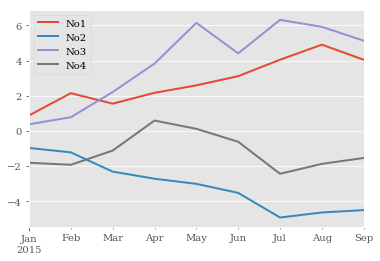

In [35]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

本质上，pandas提供matplotlib的一个封装器，专门为DataFrame对象所设计。下面是plot方法的参数：

```python
df.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
Type:           FramePlotMethods
Docstring:     
DataFrame plotting accessor and method

Examples
--------
>>> df.plot.line()
>>> df.plot.scatter('x', 'y')
>>> df.plot.hexbin()

These plotting methods can also be accessed by calling the accessor as a
method with the ``kind`` argument:
``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
Call docstring:
Make plots of DataFrame using matplotlib / pylab.

*New in version 0.17.0:* Each plot kind has a corresponding method on the
``DataFrame.plot`` accessor:
``df.plot(kind='line')`` is equivalent to
``df.plot.line()``.

Parameters
----------
data : DataFrame
x : label or position, default None (只在列值为x刻度时使用)
y : label or position, default None (只在列值为x刻度时使用)
    Allows plotting of one column versus another
kind : str   (图表类型)
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot
ax : matplotlib axes object, default None (绘图使用的matplotlib轴对象)
subplots : boolean, default False
    Make separate subplots for each column(子图中的绘图列)
sharex : boolean, default True if ax is None else False (共用x轴)
    In case subplots=True, share x axis and set some x axis labels to
    invisible; defaults to True if ax is None otherwise False if an ax
    is passed in; Be aware, that passing in both an ax and sharex=True
    will alter all x axis labels for all axis in a figure!
sharey : boolean, default False  (共用y轴)
    In case subplots=True, share y axis and set some y axis labels to
    invisible
layout : tuple (optional)
    (rows, columns) for the layout of subplots
figsize : a tuple (width, height) in inches
use_index : boolean, default True
    Use index as ticks for x axis (使用DataFrame.index作为x轴刻度)
title : string or list
    Title to use for the plot(图表标题). If a string is passed, print the string at
    the top of the figure. If a list is passed and `subplots` is True,
    print each item in the list above the corresponding subplot.
grid : boolean, default None (matlab style default)
    Axis grid lines (水平和垂直网格线)
legend : False/True/'reverse'
    Place legend on axis subplots  (标签图例)
style : list or dict
    matplotlib line style per column (绘图线形，每列)
logx : boolean, default False
    Use log scaling on x axis (x轴的对数刻度)
logy : boolean, default False  (y轴的对数刻度)
    Use log scaling on y axis
loglog : boolean, default False
    Use log scaling on both x and y axes
xticks : sequence (默认Index)
    Values to use for the xticks (x轴的刻度)
yticks : sequence (默认Values)
    Values to use for the yticks(y轴刻度)
xlim : 2-tuple/list  (x轴的界限)
ylim : 2-tuple/list  (y轴的界限)
rot : int, default None
    Rotation for ticks (xticks for vertical, yticks for horizontal plots)  (旋转x轴刻度)
fontsize : int, default None
    Font size for xticks and yticks
colormap : str or matplotlib colormap object, default None
    Colormap to select colors from. If string, load colormap with that name
    from matplotlib.   (用于绘图的颜色映射)
colorbar : boolean, optional
    If True, plot colorbar (only relevant for 'scatter' and 'hexbin' plots)
position : float
    Specify relative alignments for bar plot layout.
    From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)
layout : tuple (optional)
    (rows, columns) for the layout of the plot
table : boolean, Series or DataFrame, default False
    If True, draw a table using the data in the DataFrame and the data will
    be transposed to meet matplotlib's default layout.
    If a Series or DataFrame is passed, use passed data to draw a table.
yerr : DataFrame, Series, array-like, dict and str
    See :ref:`Plotting with Error Bars <visualization.errorbars>` for
    detail.
xerr : same types as yerr.
stacked : boolean, default False in line and
    bar plots, and True in area plot. If True, create stacked plot.(堆叠，只用于柱状图)
sort_columns : boolean, default False
    Sort column names to determine plot ordering (在绘图之前，将列按字母顺序排列)
secondary_y : boolean or sequence, default False
    Whether to plot on the secondary y-axis  (第二个y轴)
    If a list/tuple, which columns to plot on secondary y-axis
mark_right : boolean, default True   (第二个y轴，自动设置标签)
    When using a secondary_y axis, automatically mark the column
    labels with "(right)" in the legend
kwds : keywords
    Options to pass to matplotlib plotting method (传递给matplotlib选项)

Returns
-------
axes : matplotlib.AxesSubplot or np.array of them

Notes
-----

- See matplotlib documentation online for more on this subject
- If `kind` = 'bar' or 'barh', you can specify relative alignments
  for bar plot layout by `position` keyword.
  From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)
- If `kind` = 'scatter' and the argument `c` is the name of a dataframe
  column, the values of that column are used to color each point.
- If `kind` = 'hexbin', you can control the size of the bins with the
  `gridsize` argument. By default, a histogram of the counts around each
  `(x, y)` point is computed. You can specify alternative aggregations
  by passing values to the `C` and `reduce_C_function` arguments.
  `C` specifies the value at each `(x, y)` point and `reduce_C_function`
  is a function of one argument that reduces all the values in a bin to
  a single number (e.g. `mean`, `max`, `sum`, `std`).
```

# Series 类

In [36]:
type(df)

pandas.core.frame.DataFrame

In [37]:
df['No1']

2015-01-31    0.883851
2015-02-28    1.267195
2015-03-31   -0.596024
2015-04-30    0.616109
2015-05-31    0.424360
2015-06-30    0.523468
2015-07-31    0.933527
2015-08-31    0.856280
2015-09-30   -0.858753
Freq: M, Name: No1, dtype: float64

In [38]:
type(df['No1'])

pandas.core.series.Series

DataFrame的主要方法也可用于Series对象：

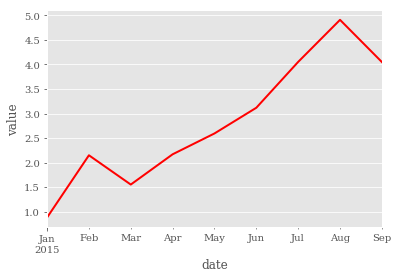

In [39]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

# GroupBy Operations

pandas具备强大而灵活的分组功能，工作方式类似于SQL中的分组和Microsoft Excel中的透视表。为了进行分组，我们添加一列，表示对应索引数据所属的季度：

In [40]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,0.883851,-0.961183,0.383887,-1.802687,Q1
2015-02-28,1.267195,-0.251781,0.400204,-0.117185,Q1
2015-03-31,-0.596024,-1.095059,1.429807,0.807176,Q1
2015-04-30,0.616109,-0.402194,1.616859,1.707242,Q2
2015-05-31,0.424360,-0.292295,2.316483,-0.469215,Q2
2015-06-30,0.523468,-0.514087,-1.732358,-0.736181,Q2
2015-07-31,0.933527,-1.399667,1.904331,-1.820248,Q3
2015-08-31,0.856280,0.286347,-0.397159,0.564787,Q3
2015-09-30,-0.858753,0.135108,-0.789764,0.335903,Q3


现在，我们可以根据“Quarter”列分组，输出单独组的统计数字：

In [41]:
groups = df.groupby('Quarter')

In [42]:
groups.mean()  # 每组的平均值

,No1,No2,No3,No4
Quarter,,,,
Q1,0.518341,-0.769341,0.737966,-0.370899
Q2,0.521312,-0.402859,0.733662,0.167282
Q3,0.310351,-0.326071,0.239136,-0.306520


In [43]:
groups.max()  # 每组的最大值

,No1,No2,No3,No4
Quarter,,,,
Q1,1.267195,-0.251781,1.429807,0.807176
Q2,0.616109,-0.292295,2.316483,1.707242
Q3,0.933527,0.286347,1.904331,0.564787


In [44]:
groups.size()  # 组的大小

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

分组可在多列上进行，我们添加一列，表示索引月份是奇数还是偶数：

In [45]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [46]:
groups = df.groupby(['Quarter','Odd_Even'])

In [47]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [48]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      1.267195 -0.251781  0.400204 -0.117185
        Odd       0.143914 -1.028121  0.906847 -0.497755
Q2      Even      0.569788 -0.458141 -0.057749  0.485531
        Odd       0.424360 -0.292295  2.316483 -0.469215
Q3      Even      0.856280  0.286347 -0.397159  0.564787
        Odd       0.037387 -0.632280  0.557283 -0.742173

## Financial Data

In [49]:
from pandas_datareader import data as web

pandas内建函数`DataReader`从Web读取数据，进行数据分析(DAX)

In [51]:
DAX = web.DataReader(name='SPY', data_source='google',
                     start='2000-1-1')   
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2001-10-16 to 2017-09-11
Data columns (total 5 columns):
Open      3980 non-null float64
High      3980 non-null float64
Low       3980 non-null float64
Close     4000 non-null float64
Volume    4000 non-null int64
dtypes: float64(4), int64(1)
memory usage: 187.5 KB


```json
Signature: web.DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.001, session=None, access_key=None)
Docstring:
Imports data from a number of online sources.

Currently supports Yahoo! Finance, Google Finance, St. Louis FED (FRED),
Kenneth French's data library, and the SEC's EDGAR Index.

Parameters
----------
name : str or list of strs
    the name of the dataset. Some data sources (yahoo, google, fred) will
    accept a list of names.
data_source: {str, None}
    the data source ("yahoo", "yahoo-actions", "yahoo-dividends",
    "google", "fred", "ff", or "edgar-index")
start : {datetime, None}
    left boundary for range (defaults to 1/1/2010)
end : {datetime, None}
    right boundary for range (defaults to today)
retry_count : {int, 3}
    Number of times to retry query request.
pause : {numeric, 0.001}
    Time, in seconds, to pause between consecutive queries of chunks. If
    single value given for symbol, represents the pause between retries.
session : Session, default None
        requests.sessions.Session instance to be used

Examples
----------

# Data from Yahoo! Finance
gs = DataReader("GS", "yahoo")

# Corporate Actions (Dividend and Split Data)
# with ex-dates from Yahoo! Finance
gs = DataReader("GS", "yahoo-actions")

# Data from Google Finance
aapl = DataReader("AAPL", "google")

# Data from FRED
vix = DataReader("VIXCLS", "fred")

# Data from Fama/French
ff = DataReader("F-F_Research_Data_Factors", "famafrench")
ff = DataReader("F-F_Research_Data_Factors_weekly", "famafrench")
ff = DataReader("6_Portfolios_2x3", "famafrench")
ff = DataReader("F-F_ST_Reversal_Factor", "famafrench")

# Data from EDGAR index
ed = DataReader("full", "edgar-index")
ed2 = DataReader("daily", "edgar-index")
Type:      function
```

In [52]:
DAX.tail()  # tail方法提供数据集的最后5行

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-31,246.72,247.77,246.05,247.49,103803880
2017-09-01,247.92,248.33,247.67,247.84,62006989
2017-09-05,247.26,247.52,244.95,246.06,91398777
2017-09-08,246.54,247.11,246.30,246.58,63832825
2017-09-11,248.04,249.30,248.02,249.21,71364848


为了更好的概览指数的历史，可再次使用plot方法生成一个图表：

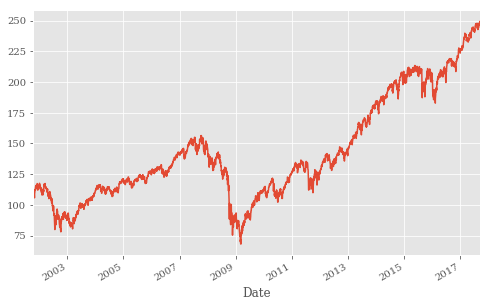

In [53]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

和NumPy ndarray类似，pandas允许在整个甚至复杂的DataFame对象上进行向量化数学运算：

In [ ]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] /
                                DAX['Close'][i - 1])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [ ]:
DAX[['Close', 'Ret_Loop']].tail()

shift 方法实现向量化：   
它相对于索引向前或向后移动Series或者整个DataFame对象。

In [7]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

Wall time: 65.2 ms


In [ ]:
del DAX['Ret_Loop'] 

In [10]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBDF69A58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBDFF9CC0>], dtype=object)

移动平均值(即趋势)使用`rolling_mean`函数计算：

In [11]:
DAX['42d'] = DAX['Close'].rolling(window=42).mean()
DAX['252d'] = DAX['Close'].rolling(window=252).mean()

In [12]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2017-08-30,246.01,245.308571,231.418810
2017-08-31,247.49,245.434286,231.538294
2017-09-01,247.84,245.555000,231.659127
2017-09-05,246.06,245.686190,231.769008
2017-09-08,246.58,245.792619,231.878333


In [13]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [14]:
import math
DAX['Mov_Vol'] = DAX['Return'].rolling(window=252).std() * math.sqrt(252)
  # moving annual volatility

In [15]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBE1C3A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001ADBE1049E8>], dtype=object)

**波动率聚集**：    
    波动率不是长期恒定的；既有高波动率时期(正收益和负收益都很高),也有低波动率时期
    
**杠杆效应**：   
    一般地，波动性和股票市场收益是负相关的；当市场下跌时波动性升高，反之亦然。

In [3]:
import pandas as pd
from urllib import request

In [4]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
request.urlretrieve(es_url, './data/es.txt')
request.urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <http.client.HTTPMessage at 0x1dfa9421828>)

In [5]:
ls .\data\*.txt

 驱动器 C 中的卷是 Windows
 卷的序列号是 1E3D-4470

 C:\Users\xiner\Source\Repos\MyStudy\content\data 的目录

2017/09/12  16:48           688,500 es.txt
2017/09/12  16:38           539,080 es50.txt
2017/09/12  16:48           363,485 vs.txt
               3 个文件      1,591,065 字节
               0 个目录 131,563,757,568 可用字节


用pandas直接读取EURO STOXX 50数据不是最好的途径，事先需要进行数据清理：    
1. 有两个额外的标题行无需导入；
2. 从2001年12月27日开始，数据集中每行数据的最后‘突然’出现一个额外的分号。

In [6]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]   # 删除所有空白

至于标题，我们可以打印前几行数据进行检查：

In [7]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

上面提到的格式更改可以在文件的第3883和3990行之间看到。

In [8]:
for line in lines[3883:3890]:
    print(line[41:], end='')

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


为了使得数据集更容易导入，我们进行如下处理：     
1. 生成一个新的文本文件
2. 删除不需要的标题行
3. 在新文件中写入对应的新标题行
4. 添加一个辅助列DEL(捕捉最后的分号)
5. 将所有数据写入新文件

In [9]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [10]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [11]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [12]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2016-09-28,2847.0,2991.0,343.0,324.0,408.0,350.0,9072.0,581.0,NaN
2016-09-29,2849.0,2992.0,343.0,324.0,408.0,351.0,9112.0,583.0,NaN
2016-09-30,2843.0,3002.0,343.0,325.0,408.0,350.0,9116.0,583.0,NaN
2016-10-03,2845.0,2998.0,343.0,325.0,408.0,351.0,9131.0,584.0,NaN
2016-10-04,2871.0,3030.0,346.0,328.0,411.0,354.0,9212.0,589.0,NaN


辅助列已经完成使命，可以删除：

In [13]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [14]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [15]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-09-28,2846.55,2991.11,342.57,324.24,407.97,350.45,9072.09,581.27
2016-09-29,2848.93,2991.58,342.72,324.08,407.65,350.90,9112.09,582.60
2016-09-30,2843.17,3002.24,342.92,325.31,408.27,350.09,9115.81,583.26
2016-10-03,2845.43,2998.50,343.23,325.08,408.44,350.92,9131.24,584.32
2016-10-04,2871.06,3029.50,346.10,327.73,411.41,353.92,9212.05,588.71


In [16]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


#### read_csv函数参数：
```json
filepath_or_buffer : str, pathlib.Path, py._path.local.LocalPath or any object with a read() method (such as a file handle or StringIO)
    The string could be a URL. Valid URL schemes include http, ftp, s3, and
    file. For file URLs, a host is expected. For instance, a local file could
    be file ://localhost/path/to/table.csv
sep : str, default ','
    Delimiter to use. If sep is None, the C engine cannot automatically detect
    the separator, but the Python parsing engine can, meaning the latter will
    be used automatically. In addition, separators longer than 1 character and
    different from ``'\s+'`` will be interpreted as regular expressions and
    will also force the use of the Python parsing engine. Note that regex
    delimiters are prone to ignoring quoted data. Regex example: ``'\r\t'``
delimiter : str, default ``None``
    Alternative argument name for sep.
delim_whitespace : boolean, default False
    Specifies whether or not whitespace (e.g. ``' '`` or ``'    '``) will be
    used as the sep. Equivalent to setting ``sep='\s+'``. If this option
    is set to True, nothing should be passed in for the ``delimiter``
    parameter.

    .. versionadded:: 0.18.1 support for the Python parser.

header : int or list of ints, default 'infer'
    Row number(s) to use as the column names, and the start of the data.
    Default behavior is as if set to 0 if no ``names`` passed, otherwise
    ``None``. Explicitly pass ``header=0`` to be able to replace existing
    names. The header can be a list of integers that specify row locations for
    a multi-index on the columns e.g. [0,1,3]. Intervening rows that are not
    specified will be skipped (e.g. 2 in this example is skipped). Note that
    this parameter ignores commented lines and empty lines if
    ``skip_blank_lines=True``, so header=0 denotes the first line of data
    rather than the first line of the file.
names : array-like, default None
    List of column names to use. If file contains no header row, then you
    should explicitly pass header=None. Duplicates in this list are not
    allowed unless mangle_dupe_cols=True, which is the default.
index_col : int or sequence or False, default None
    Column to use as the row labels of the DataFrame. If a sequence is given, a
    MultiIndex is used. If you have a malformed file with delimiters at the end
    of each line, you might consider index_col=False to force pandas to _not_
    use the first column as the index (row names)
usecols : array-like or callable, default None
    Return a subset of the columns. If array-like, all elements must either
    be positional (i.e. integer indices into the document columns) or strings
    that correspond to column names provided either by the user in `names` or
    inferred from the document header row(s). For example, a valid array-like
    `usecols` parameter would be [0, 1, 2] or ['foo', 'bar', 'baz'].

    If callable, the callable function will be evaluated against the column
    names, returning names where the callable function evaluates to True. An
    example of a valid callable argument would be ``lambda x: x.upper() in
    ['AAA', 'BBB', 'DDD']``. Using this parameter results in much faster
    parsing time and lower memory usage.
as_recarray : boolean, default False
    DEPRECATED: this argument will be removed in a future version. Please call
    `pd.read_csv(...).to_records()` instead.

    Return a NumPy recarray instead of a DataFrame after parsing the data.
    If set to True, this option takes precedence over the `squeeze` parameter.
    In addition, as row indices are not available in such a format, the
    `index_col` parameter will be ignored.
squeeze : boolean, default False
    If the parsed data only contains one column then return a Series
prefix : str, default None
    Prefix to add to column numbers when no header, e.g. 'X' for X0, X1, ...
mangle_dupe_cols : boolean, default True
    Duplicate columns will be specified as 'X.0'...'X.N', rather than
    'X'...'X'. Passing in False will cause data to be overwritten if there
    are duplicate names in the columns.
dtype : Type name or dict of column -> type, default None
    Data type for data or columns. E.g. {'a': np.float64, 'b': np.int32}
    Use `str` or `object` to preserve and not interpret dtype.
    If converters are specified, they will be applied INSTEAD
    of dtype conversion.
engine : {'c', 'python'}, optional
    Parser engine to use. The C engine is faster while the python engine is
    currently more feature-complete.
converters : dict, default None
    Dict of functions for converting values in certain columns. Keys can either
    be integers or column labels
true_values : list, default None
    Values to consider as True
false_values : list, default None
    Values to consider as False
skipinitialspace : boolean, default False
    Skip spaces after delimiter.
skiprows : list-like or integer or callable, default None
    Line numbers to skip (0-indexed) or number of lines to skip (int)
    at the start of the file.

    If callable, the callable function will be evaluated against the row
    indices, returning True if the row should be skipped and False otherwise.
    An example of a valid callable argument would be ``lambda x: x in [0, 2]``.
skipfooter : int, default 0
    Number of lines at bottom of file to skip (Unsupported with engine='c')
skip_footer : int, default 0
    DEPRECATED: use the `skipfooter` parameter instead, as they are identical
nrows : int, default None
    Number of rows of file to read. Useful for reading pieces of large files
na_values : scalar, str, list-like, or dict, default None
    Additional strings to recognize as NA/NaN. If dict passed, specific
    per-column NA values.  By default the following values are interpreted as
    NaN: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'nan'`.
keep_default_na : bool, default True
    If na_values are specified and keep_default_na is False the default NaN
    values are overridden, otherwise they're appended to.
na_filter : boolean, default True
    Detect missing value markers (empty strings and the value of na_values). In
    data without any NAs, passing na_filter=False can improve the performance
    of reading a large file
verbose : boolean, default False
    Indicate number of NA values placed in non-numeric columns
skip_blank_lines : boolean, default True
    If True, skip over blank lines rather than interpreting as NaN values
parse_dates : boolean or list of ints or names or list of lists or dict, default False

    * boolean. If True -> try parsing the index.
    * list of ints or names. e.g. If [1, 2, 3] -> try parsing columns 1, 2, 3
      each as a separate date column.
    * list of lists. e.g.  If [[1, 3]] -> combine columns 1 and 3 and parse as
      a single date column.
    * dict, e.g. {'foo' : [1, 3]} -> parse columns 1, 3 as date and call result
      'foo'

    If a column or index contains an unparseable date, the entire column or
    index will be returned unaltered as an object data type. For non-standard
    datetime parsing, use ``pd.to_datetime`` after ``pd.read_csv``

    Note: A fast-path exists for iso8601-formatted dates.
infer_datetime_format : boolean, default False
    If True and parse_dates is enabled, pandas will attempt to infer the format
    of the datetime strings in the columns, and if it can be inferred, switch
    to a faster method of parsing them. In some cases this can increase the
    parsing speed by 5-10x.
keep_date_col : boolean, default False
    If True and parse_dates specifies combining multiple columns then
    keep the original columns.
date_parser : function, default None
    Function to use for converting a sequence of string columns to an array of
    datetime instances. The default uses ``dateutil.parser.parser`` to do the
    conversion. Pandas will try to call date_parser in three different ways,
    advancing to the next if an exception occurs: 1) Pass one or more arrays
    (as defined by parse_dates) as arguments; 2) concatenate (row-wise) the
    string values from the columns defined by parse_dates into a single array
    and pass that; and 3) call date_parser once for each row using one or more
    strings (corresponding to the columns defined by parse_dates) as arguments.
dayfirst : boolean, default False
    DD/MM format dates, international and European format
iterator : boolean, default False
    Return TextFileReader object for iteration or getting chunks with
    ``get_chunk()``.
chunksize : int, default None
    Return TextFileReader object for iteration.
    See the `IO Tools docs
    <http://pandas.pydata.org/pandas-docs/stable/io.html#io-chunking>`_
    for more information on ``iterator`` and ``chunksize``.
compression : {'infer', 'gzip', 'bz2', 'zip', 'xz', None}, default 'infer'
    For on-the-fly decompression of on-disk data. If 'infer', then use gzip,
    bz2, zip or xz if filepath_or_buffer is a string ending in '.gz', '.bz2',
    '.zip', or 'xz', respectively, and no decompression otherwise. If using
    'zip', the ZIP file must contain only one data file to be read in.
    Set to None for no decompression.

    .. versionadded:: 0.18.1 support for 'zip' and 'xz' compression.

thousands : str, default None
    Thousands separator
decimal : str, default '.'
    Character to recognize as decimal point (e.g. use ',' for European data).
float_precision : string, default None
    Specifies which converter the C engine should use for floating-point
    values. The options are `None` for the ordinary converter,
    `high` for the high-precision converter, and `round_trip` for the
    round-trip converter.
lineterminator : str (length 1), default None
    Character to break file into lines. Only valid with C parser.
quotechar : str (length 1), optional
    The character used to denote the start and end of a quoted item. Quoted
    items can include the delimiter and it will be ignored.
quoting : int or csv.QUOTE_* instance, default 0
    Control field quoting behavior per ``csv.QUOTE_*`` constants. Use one of
    QUOTE_MINIMAL (0), QUOTE_ALL (1), QUOTE_NONNUMERIC (2) or QUOTE_NONE (3).
doublequote : boolean, default ``True``
   When quotechar is specified and quoting is not ``QUOTE_NONE``, indicate
   whether or not to interpret two consecutive quotechar elements INSIDE a
   field as a single ``quotechar`` element.
escapechar : str (length 1), default None
    One-character string used to escape delimiter when quoting is QUOTE_NONE.
comment : str, default None
    Indicates remainder of line should not be parsed. If found at the beginning
    of a line, the line will be ignored altogether. This parameter must be a
    single character. Like empty lines (as long as ``skip_blank_lines=True``),
    fully commented lines are ignored by the parameter `header` but not by
    `skiprows`. For example, if comment='#', parsing '#empty\na,b,c\n1,2,3'
    with `header=0` will result in 'a,b,c' being
    treated as the header.
encoding : str, default None
    Encoding to use for UTF when reading/writing (ex. 'utf-8'). `List of Python
    standard encodings
    <https://docs.python.org/3/library/codecs.html#standard-encodings>`_
dialect : str or csv.Dialect instance, default None
    If provided, this parameter will override values (default or not) for the
    following parameters: `delimiter`, `doublequote`, `escapechar`,
    `skipinitialspace`, `quotechar`, and `quoting`. If it is necessary to
    override values, a ParserWarning will be issued. See csv.Dialect
    documentation for more details.
tupleize_cols : boolean, default False
    Leave a list of tuples on columns as is (default is to convert to
    a Multi Index on the columns)
error_bad_lines : boolean, default True
    Lines with too many fields (e.g. a csv line with too many commas) will by
    default cause an exception to be raised, and no DataFrame will be returned.
    If False, then these "bad lines" will dropped from the DataFrame that is
    returned.
warn_bad_lines : boolean, default True
    If error_bad_lines is False, and warn_bad_lines is True, a warning for each
    "bad line" will be output.
low_memory : boolean, default True
    Internally process the file in chunks, resulting in lower memory use
    while parsing, but possibly mixed type inference.  To ensure no mixed
    types either set False, or specify the type with the `dtype` parameter.
    Note that the entire file is read into a single DataFrame regardless,
    use the `chunksize` or `iterator` parameter to return the data in chunks.
    (Only valid with C parser)
buffer_lines : int, default None
    DEPRECATED: this argument will be removed in a future version because its
    value is not respected by the parser
compact_ints : boolean, default False
    DEPRECATED: this argument will be removed in a future version

    If compact_ints is True, then for any column that is of integer dtype,
    the parser will attempt to cast it as the smallest integer dtype possible,
    either signed or unsigned depending on the specification from the
    `use_unsigned` parameter.
use_unsigned : boolean, default False
    DEPRECATED: this argument will be removed in a future version

    If integer columns are being compacted (i.e. `compact_ints=True`), specify
    whether the column should be compacted to the smallest signed or unsigned
    integer dtype.
memory_map : boolean, default False
    If a filepath is provided for `filepath_or_buffer`, map the file object
    directly onto memory and access the data directly from there. Using this
    option can improve performance because there is no longer any I/O overhead.

Returns
-------
result : DataFrame or TextParser
```

In [17]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

使用时间序列中的最后可用值填补遗漏的数值，调用 `fillna`方法，以`ffill`(用于向前填充)作为method参数的值。

In [18]:
data = data.fillna(method = 'ffill')

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4554 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4554 non-null float64
dtypes: float64(2)
memory usage: 266.7 KB


In [19]:
data.tail()

,EUROSTOXX,VSTOXX
2016-09-28,2991.11,35.6846
2016-09-29,2991.58,35.6846
2016-09-30,3002.24,35.6846
2016-10-03,2998.50,35.6846
2016-10-04,3029.50,35.6846


In [20]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFA9521C18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001DFA96687F0>], dtype=object)

In [21]:
rets = np.log(data / data.shift(1)) 
rets.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


In [22]:
rets.dropna(inplace=True)

In [23]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFA976B518>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001DFA9821C50>], dtype=object)

# 拓展：
- [pandas库](http://pandas.pydata.org)
- [在线帮助文件](http://pandas.pydata.org/pandas-docs/stable/)
- [pandas功能](http://pandas.pydata.org/pandasdocs/stable/pandas.pdf)